In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_DIR = "/home/abhishar/Downloads/backup/flowers/"

In [3]:
IMG_SHAPE = (150, 150, 3)

In [4]:
import os

In [5]:
import random

In [6]:
lookup = pd.read_csv(DATA_DIR+"train.csv")
lookup.head()

,image_id,category
0,0,77
1,1,81
2,2,52
3,3,72
4,4,58


In [7]:
labels = pd.get_dummies(lookup.category)
labels.head()

,1,2,3,4,5,6,7,8,9,10,...,93,94,95,96,97,98,99,100,101,102
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<BarContainer object of 102 artists>

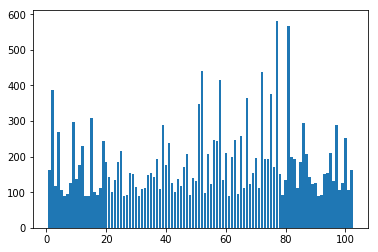

In [8]:
plt.bar(height=lookup.category.value_counts(), x=lookup.category.unique())

In [9]:
lookup.category.min()

1

In [10]:
lookup.dtypes

image_id    int64
category    int64
dtype: object

In [11]:
categories = []
with open(DATA_DIR+"categories.txt") as f:
    for line in f.readlines():
        categories.append(line.strip())
categories[0]

'pink primrose'

In [12]:
len(categories)

102

In [13]:
import cv2

Text(0.5, 1.0, '3780.jpg : silverbush')

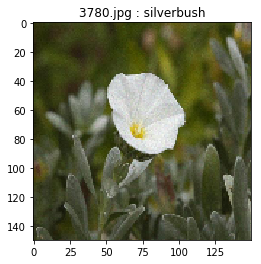

In [14]:
img_id = random.choice(os.listdir(DATA_DIR+"train/"))
img = plt.imread(DATA_DIR+"train/"+img_id)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = img/255
img = cv2.resize(img, IMG_SHAPE[:2])
plt.imshow(img)
plt.title(img_id+" : "+categories[lookup.loc[int(img_id[:-4]), "category"] -1])

In [15]:
img.dtype

dtype('uint8')

In [16]:
import sys
sys.getsizeof(img)/(1024*1024)

0.06449508666992188

In [17]:
0.064*20000/(1024*1024)

0.001220703125

In [18]:

from tqdm import tqdm, tqdm_gui, tqdm_notebook

In [19]:
num_images = len(os.listdir(DATA_DIR+"train/"))

In [20]:
X = np.zeros((num_images, img.shape[0], img.shape[1], img.shape[2]), dtype=np.uint8)

In [21]:
sys.getsizeof(X)/(1024**3)

1.1655037701129913

In [23]:
import pickle

In [29]:
with open("flowers_data.pickle", "rb") as f:
    t = pickle.load(f)

In [31]:
X = t

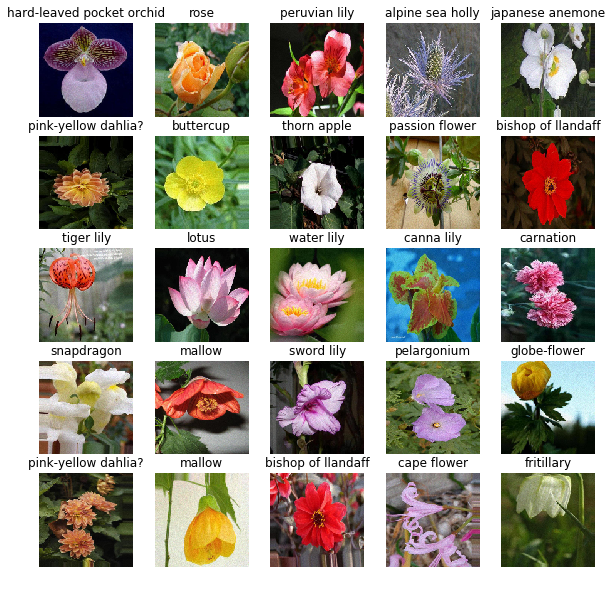

In [32]:
fig,  ax = plt.subplots(5, 5, figsize=(10,10))
random.seed(10)
for i in range(5):
    for j in range(5):
        img_id = random.randint(0, X.shape[0]-1)
        ax[i,j].imshow(X[img_id, :, :, :])
        ax[i,j].set_title(categories[lookup.loc[img_id,"category"]-1])
        ax[i,j].axis("off")

In [33]:
from tensorflow.keras.models import load_model

In [34]:
model = load_model("model_05.h5")

W0831 15:05:45.332732 140305258137408 deprecation.py:506] From /home/abhishar/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0831 15:05:45.335078 140305258137408 deprecation.py:506] From /home/abhishar/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0831 15:05:45.336787 140305258137408 deprecation.py:506] From /home/abhishar/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from

In [35]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [36]:
from tensorflow.keras.backend import eval

In [37]:
eval(model.optimizer.lr)

0.001

In [38]:
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(rescale=1/255, rotation_range=90, width_shift_range=0.2,
                              height_shift_range = 0.2, shear_range=0.2, zoom_range=0.1,
                              horizontal_flip=True, vertical_flip=True, fill_mode="nearest")

In [40]:
train_ind = np.random.choice(range(X.shape[0]), int(X.shape[0]*0.75), replace=False)
test_ind = np.array([i for i in range(X.shape[0]) if i not in train_ind])

In [ ]:
train_generator = data_gen.flow(X[train_ind], labels.loc[train_ind], batch_size=64)
test_generator = data_gen.flow(X[test_ind], labels.loc[test_ind])

In [ ]:
history = model.fit_generator(generator=train_generator, validation_data=test_generator, epochs=50, callbacks=[TensorBoard(), EarlyStopping(patience=6)])
model.save("model_09.h5")

Epoch 1/50
218/218 [==============================] - 663s 3s/step - loss: 0.9726 - acc: 0.7305 - val_loss: 0.9565 - val_acc: 0.7357
Epoch 2/50
218/218 [==============================] - 613s 3s/step - loss: 0.9561 - acc: 0.7354 - val_loss: 0.9374 - val_acc: 0.7452
Epoch 3/50
218/218 [==============================] - 614s 3s/step - loss: 0.9459 - acc: 0.7391 - val_loss: 0.9480 - val_acc: 0.7389
Epoch 4/50
218/218 [==============================] - 613s 3s/step - loss: 0.9289 - acc: 0.7438 - val_loss: 0.9637 - val_acc: 0.7335
Epoch 5/50
218/218 [==============================] - 613s 3s/step - loss: 0.9303 - acc: 0.7406 - val_loss: 0.9356 - val_acc: 0.7413
Epoch 6/50
218/218 [==============================] - 623s 3s/step - loss: 0.9250 - acc: 0.7450 - val_loss: 0.9275 - val_acc: 0.7480
Epoch 7/50
218/218 [==============================] - 616s 3s/step - loss: 0.9026 - acc: 0.7488 - val_loss: 0.9513 - val_acc: 0.7396
Epoch 8/50
218/218 [==============================] - 617s 3s/step - 